In [172]:
pip install keras

In [173]:
import numpy as np
np.random.seed(123)  # for reproducibility

In [174]:
from keras.models import Sequential

In [175]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import UpSampling2D

from keras.utils import np_utils


In [176]:

from google.colab import drive
drive.mount('/content/drive/')                                   

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [177]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/TARGETS/TRAIN/17_DEG'
valid_path = '/content/drive/MyDrive/Datasets/TARGETS/TEST/15_DEG'


In [178]:
model = Sequential()
model.add(Convolution2D(8, (12, 2), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=IMAGE_SIZE + [3]))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Convolution2D(8, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Convolution2D(8, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(Convolution2D(8, (2, 2), strides=(2,2), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(UpSampling2D((2, 2), interpolation='bilinear'))
model.add(Convolution2D(8, (2, 2), activation='relu'))
model.add(UpSampling2D((2, 2), interpolation='bilinear'))
model.add(Convolution2D(8, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(UpSampling2D((2, 2), interpolation='bilinear'))
model.add(Convolution2D(1, (2, 2), activation='sigmoid', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [179]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [180]:
model.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_366 (Conv2D)          (None, 224, 224, 8)       584       
_________________________________________________________________
max_pooling2d_121 (MaxPoolin (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_367 (Conv2D)          (None, 112, 112, 8)       264       
_________________________________________________________________
max_pooling2d_122 (MaxPoolin (None, 56, 56, 8)         0         
_________________________________________________________________
conv2d_368 (Conv2D)          (None, 56, 56, 8)         264       
_________________________________________________________________
conv2d_369 (Conv2D)          (None, 28, 28, 8)         264       
_________________________________________________________________
up_sampling2d_134 (UpSamplin (None, 56, 56, 8)       

In [181]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [182]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/TARGETS/TRAIN/17_DEG',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1622 images belonging to 3 classes.


In [183]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/TARGETS/TEST/15_DEG',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1365 images belonging to 3 classes.


In [184]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch = len(training_set),
  validation_steps = len(test_set)  
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
51/51 [==============================] - 22s 425ms/step - loss: 6.5612 - accuracy: 0.4361 - val_loss: 0.8846 - val_accuracy: 0.6689
Epoch 2/100
51/51 [==============================] - 21s 420ms/step - loss: 0.8752 - accuracy: 0.6730 - val_loss: 0.8016 - val_accuracy: 0.6791
Epoch 3/100
51/51 [==============================] - 22s 423ms/step - loss: 0.8258 - accuracy: 0.6640 - val_loss: 0.7688 - val_accuracy: 0.6974
Epoch 4/100
51/51 [==============================] - 22s 423ms/step - loss: 0.7873 - accuracy: 0.6704 - val_loss: 0.7312 - val_accuracy: 0.7429
Epoch 5/100
51/51 [==============================] - 21s 417ms/step - loss: 0.7345 - accuracy: 0.6998 - val_loss: 0.8114 - val_accuracy: 0.7077
Epoch 6/100
51/51 [==============================] - 21s 419ms/step - loss: 0.7662 - accuracy: 0.7010 - val_loss: 0.7577 - val_accuracy: 0.7282
Epoch 7/100
51/51 [==============================] - 21s 413ms/step - loss: 0.7552 - accuracy: 0.6948 - val_loss: 0.7728 - val_accuracy:

In [185]:
import matplotlib.pyplot as plt

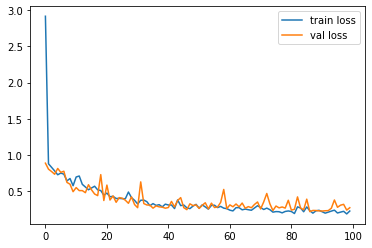

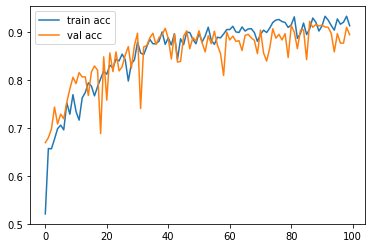

<Figure size 432x288 with 0 Axes>

In [186]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model = Sequential()


 

model.add(Convolution2D(32, 1, 1, activation='relu',input_shape=IMAGE_SIZE + [3]))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))
model.add(Convolution2D(32, 1, 1, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64, 3, 3, activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
 
model = Sequential()
model.add(Convolution2D(16, 3, 3, activation='relu',padding='same',input_shape=IMAGE_SIZE + [3]))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Convolution2D(8, 3, 3, activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Convolution2D(8, 3, 3, activation='relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Convolution2D(8, 3, 3, activation='relu',padding='same'))
model.add(UpSampling2D((2, 2), interpolation='bilinear'))
model.add(Convolution2D(8, 3, 3, activation='relu',padding='same'))
model.add(UpSampling2D((2, 2), interpolation='bilinear'))
model.add(Convolution2D(16, 3, 3, activation='relu',padding='same'))
model.add(UpSampling2D((2, 2), interpolation='bilinear'))
model.add(Convolution2D(1, 3, 3, activation='relu',padding='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))